<a href="https://colab.research.google.com/github/avi78/Tensorflow-Day-2/blob/main/User_Reviews_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import re
import nltk

In [3]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [7]:
training_data.head()  # head - top 5 rows will be printed

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
training_data.tail()  # tail - last 5 rows will be printed


,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [10]:
training_data.sample(10)   #random 10 rows

,id,keyword,location,text,target
4773,6792,lightning,"Holland MI via Houston, CLE",Corey Robinson having some solid reps at RT al...,0
6360,9090,structural%20failure,NaN,Investigators say a fatal Virgin Galactic spac...,1
1148,1653,bombing,Toronto-Citizen of Canada & US,@rinkydnk2 @ZaibatsuNews @NeoProgressive1 When...,1
5618,8016,refugees,paradise,#retweet Cameroon repatriating about 12000 Nig...,1
3712,5280,fear,NaN,FEAR - YouTube http://t.co/PrmtxjJdue,0
789,1143,blight,Central Illinois,@todd_calfee so @mattburgener wanted to see th...,1
6634,9501,terrorist,NaN,HereÛªs how media in Pakistan covered the cap...,0
4899,6974,massacre,Ecuador,Don't mess with my Daddy I can be a massacre. ...,0
2534,3638,desolation,NaN,Escape The Heat (and the #ORShow) for a trail ...,0
6999,10036,twister,NaN,@carolinagutierr grande twister!!!,0


In [11]:
training_data[training_data['target'] == 0].shape

(4342, 5)

In [12]:
training_data[training_data['target'] == 1].shape


(3271, 5)

### Text-Preprocessing

#### 1. To lower case

In [14]:
training_data['new_text'] = training_data['text'].apply(lambda x:x.lower())

In [17]:
training_data.sample(5)

,id,keyword,location,text,target,new_text
4852,6911,mass%20murderer,wisco,It's like God wants me to become a mass murder...,0,it's like god wants me to become a mass murder...
6059,8658,sinkhole,"White Plains, NY",I've been trying to write a theological short ...,0,i've been trying to write a theological short ...
3907,5557,flattened,NaN,100 1' MIX NEW FLAT DOUBLE SIDED LINERLESS BO...,0,100 1' mix new flat double sided linerless bo...
243,346,annihilation,"California, USA",@rvfriedmann Hell is just a fraction of his be...,1,@rvfriedmann hell is just a fraction of his be...
4811,6848,loud%20bang,NaN,I don't laugh out loud at many things. But man...,0,i don't laugh out loud at many things. but man...


#### 2. Lemmatization

In [21]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [23]:
lemm = WordNetLemmatizer()

In [32]:
training_data['new_text'] = training_data['new_text'].apply(lambda x:lemm.lemmatize(x)) 

#### 3. Remove StopWords

In [33]:
from nltk.corpus import stopwords

In [36]:
stop_words = stopwords.words("english") 

In [38]:
def remove_words(text):
  no_stop = []
  for word in text.split(' '):
    if word in stop_words:
      pass
    else:
      no_stop.append(word)
  return ' '.join(no_stop)

In [39]:
def remove_url_func(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [43]:
training_data['new_text'] = training_data['new_text'].apply(remove_words)

In [42]:
training_data['new_text'] = training_data['new_text'].apply(remove_url_func)


#### 4. Remove puctuation

In [18]:
def remove_punctuation_func(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [45]:
training_data['new_text'] = training_data['new_text'].apply(remove_punctuation_func)


In [46]:
X = training_data['new_text']
Y = training_data['target']


##### Tokenization

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
X.shape

(7613,)

In [50]:
tokenize = Tokenizer(num_words=5000,oov_token='<IDK>')
tokenize.fit_on_texts(X)

##### Tokenization Preprocessing

In [52]:
seq = tokenize.texts_to_sequences(X)

In [53]:
pad = pad_sequences(seq,padding="post",truncating="post",maxlen=50)

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
len(pad),len(Y)

(7613, 7613)

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(pad,Y,test_size=0.2,train_size=0.8)

#### Build a model- RNN

### tanh (= vanish gradients)- for RNN , sigmoid,relu, softmax : activation functions
- memory cell
- update cell
- forget cell
### in rnn - LSTM ,GRU are 2 architecture that we use
- One to many - Image caption (application of one to many archtecture)
- Many to one - Sentiment Analyze (user review)
- Many to many - Neural language translation

In [66]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(5000,64))
model.add(keras.layers.Bidirectional(keras.layers.GRU(64,return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.GRU(64)))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))


In [67]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [68]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5)

Epoch 1/5
191/191 [==============================] - 18s 55ms/step - loss: 0.5244 - accuracy: 0.7391 - val_loss: 0.4546 - val_accuracy: 0.7905
Epoch 2/5
191/191 [==============================] - 5s 27ms/step - loss: 0.3498 - accuracy: 0.8552 - val_loss: 0.4581 - val_accuracy: 0.7840
Epoch 3/5
191/191 [==============================] - 3s 17ms/step - loss: 0.2676 - accuracy: 0.8947 - val_loss: 0.5486 - val_accuracy: 0.7630
Epoch 4/5
191/191 [==============================] - 4s 19ms/step - loss: 0.2039 - accuracy: 0.9210 - val_loss: 0.6074 - val_accuracy: 0.7557
Epoch 5/5
191/191 [==============================] - 4s 20ms/step - loss: 0.1509 - accuracy: 0.9479 - val_loss: 0.6769 - val_accuracy: 0.7459


In [73]:
import matplotlib.pyplot as plt

In [74]:

ne=history.epoch
data= pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,0.524442,0.739080,0.454626,0.790545
1,0.349843,0.855172,0.458102,0.783979
2,0.267624,0.894745,0.548576,0.762968
3,0.203920,0.921018,0.607364,0.755745
4,0.150872,0.947947,0.676866,0.745896


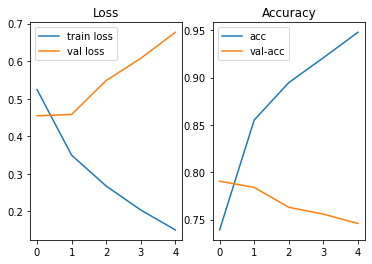

In [75]:
plt.subplot(1,2,1)
plt.plot(ne,data['loss'],label="train loss")    #x axis
plt.plot(ne,data['val_loss'],label="val loss") #y axis
plt.title("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(ne,data['accuracy'],label="acc")    #x axis
plt.plot(ne,data['val_accuracy'],label="val-acc") #y axis
plt.title("Accuracy")
plt.legend()
plt.savefig("nlp_project_result.jpg")